# Ayudantía 5 Diplomado Data Science


Cargamos la base de datos de Cáncer (Recuerde subir esta base de datos al Colab)

In [ ]:
import pandas as pd
cancer = pd.read_csv(r'Cancer.csv')
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Generamos la matriz de covariables $X$ y la variable respuesta $Y$, junto con las bases de entrenamiento y testeo.

In [ ]:
# Variable respuesta/dependiente
y = cancer.diagnosis
y = y.map({'M': 0, 'B':1}) # Transformamos respuesta a 0-1

# Variables explicadoras/independientes
lista1 = ['Unnamed: 32','id','diagnosis']
X = cancer.drop(lista1, axis =1)

# Seleccionamos solo variables _mean
lista2 = [col for col in X.columns if not col.endswith('_mean')]
X = X.drop(lista2, axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708
...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835


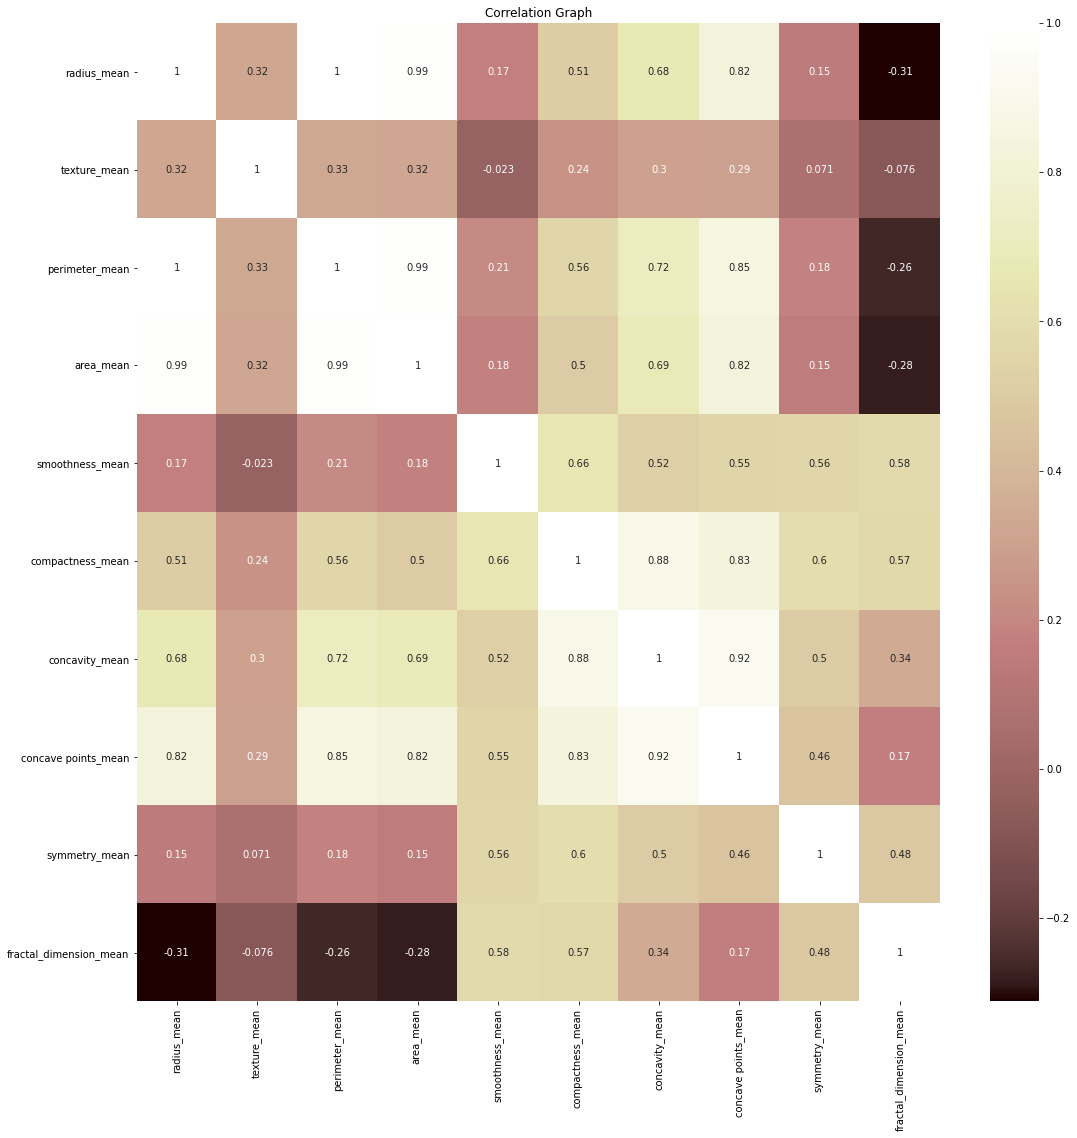

In [ ]:
# Gráfico de correlación de los datos
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18))
plt.title("Correlation Graph")
sns.heatmap(X.corr(), annot= True, cmap = 'pink')

Regresión Logística

In [ ]:
# Cargamos funciones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Ajustamos el modelo
model_log = LogisticRegression(random_state = 1, solver='liblinear')
model_log.fit(x_train,y_train)

# Calidad de ajuste
from sklearn.model_selection import cross_val_score
quality_log = cross_val_score(model_log, x_train, y_train, cv=5, scoring='f1_macro')
print('F-scores mediante validación cruzada:', quality_log)

# Validación del modelo

## Calculo de Score
score_log = model_log.score(x_test,y_test)
print('Score:', score_log)

## Calculo de f1_score
from sklearn.metrics import f1_score
pred_log = model_log.predict(x_test)

### Matriz de confusion
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test,pred_log))

F-scores mediante validación cruzada: [0.91732641 0.89230769 0.89370539 0.92770127 0.86438152]
Score: 0.8859649122807017
[[33  9]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        42
           1       0.88      0.94      0.91        72

    accuracy                           0.89       114
   macro avg       0.89      0.87      0.87       114
weighted avg       0.89      0.89      0.88       114

F-score: 0.912751677852349


Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Ajustamos el modelo
model_tree = DecisionTreeClassifier(random_state = 1)
model_tree.fit(x_train,y_train)

# Calidad de ajuste
quality_tree = cross_val_score(model_tree, x_train, y_train, cv=5, scoring='f1_macro')
print('F-scores mediante validación cruzada:', quality_tree)

# Validación del modelo

## Calculo de Score
score_tree = model_tree.score(x_test,y_test)
print('Score:', score_log)

## Calculo de f1_score
pred_tree = model_tree.predict(x_test)

### Matriz de confusion
print(confusion_matrix(y_test, pred_tree))
print(classification_report(y_test,pred_tree))

F-scores mediante validación cruzada: [0.92868339 0.94164422 0.88392857 0.8907563  0.91732641]
Score: 0.8859649122807017
[[36  6]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Ajustamos el modelo
model_rf = RandomForestClassifier(random_state = 1)
model_rf.fit(x_train,y_train)

# Calidad de ajuste
quality_rf = cross_val_score(model_rf, x_train, y_train, cv=5, scoring='f1_macro')
print('F-scores mediante validación cruzada:', quality_rf)

# Validación del modelo

## Calculo de Score
score_rf = model_rf.score(x_test,y_test)
print('Score:', score_rf)

## Calculo de f1_score
pred_rf = model_rf.predict(x_test)

### Matriz de confusion
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

F-scores mediante validación cruzada: [0.8949596  0.89707176 0.92956656 0.8907563  0.96410256]
Score: 0.9210526315789473
[[36  6]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.92      0.96      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Ajustamos el modelo
model_NB = BernoulliNB()
model_NB.fit(x_train,y_train)

# Calidad de ajuste
quality_NB = cross_val_score(model_NB, x_train, y_train, cv=5, scoring='f1_macro')
print('F-scores mediante validación cruzada:', quality_NB)

# Validación del modelo

## Calculo de Score
score_NB = model_NB.score(x_test,y_test)
print('Score:', score_NB)

## Calculo de f1_score
pred_NB = model_NB.predict(x_test)

### Matriz de confusion
print(confusion_matrix(y_test, pred_NB))
print(classification_report(y_test,pred_NB))


F-scores mediante validación cruzada: [0.38513514 0.38513514 0.38513514 0.38513514 0.38513514]
Score: 0.631578947368421
[[ 0 42]
 [ 0 72]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Encontrar el mejor K
param_grid = {
    'n_neighbors' : range(1,20),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}
model_KNN = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
model_KNN.fit(x_train,y_train)

# Calidad de ajuste
quality_KNN = cross_val_score(model_KNN, x_train, y_train, cv=5, scoring='f1_macro')
print('F-scores mediante validación cruzada:', quality_KNN)

# Validación del modelo

## Calculo de Score
score_KNN = model_KNN.score(x_test,y_test)
print('Score:', score_KNN)

## Calculo de f1_score
pred_KNN = model_KNN.predict(x_test)

### Matriz de confusion
print(confusion_matrix(y_test, pred_KNN))
print(classification_report(y_test,pred_KNN))


F-scores mediante validación cruzada: [0.88261094 0.86647993 0.89607918 0.8907563  0.82285873]
Score: 0.868421052631579
[[31 11]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.86      0.94      0.90        72

    accuracy                           0.87       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.87      0.87      0.87       114

